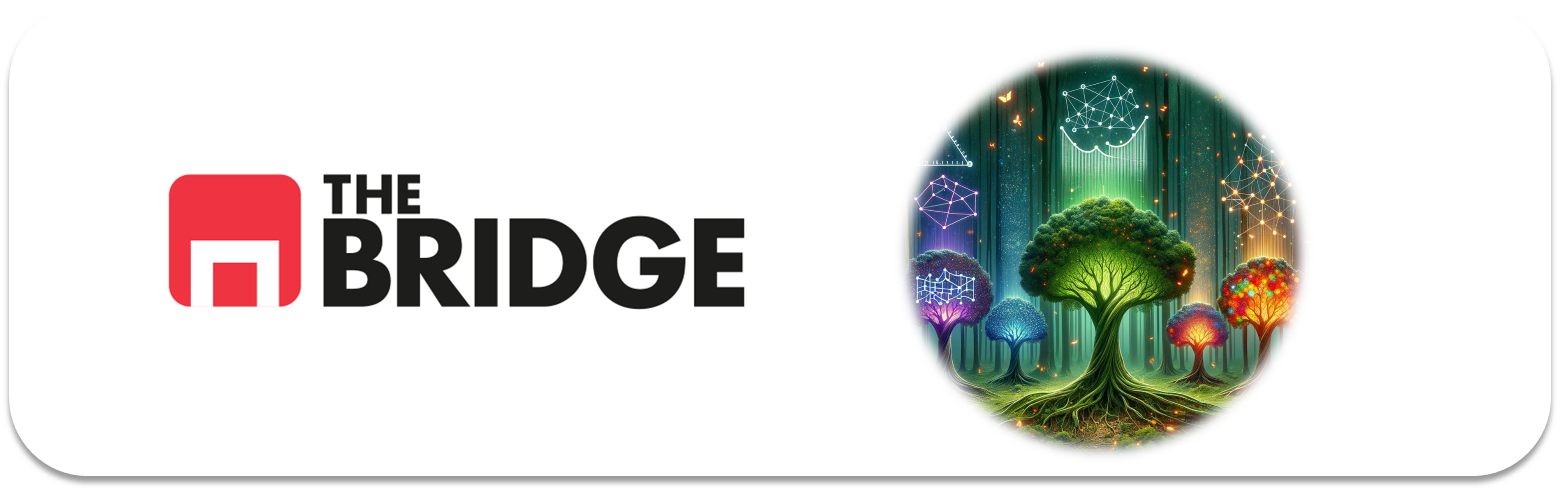

## PRACTICA OBLIGATORIA: **Ensamblado de modelos, bagging, boosting, random forest y gbts**

* La práctica obligatoria de esta unidad consiste en un único ejercicio de obtención del mejor modelo para la resolución de un problema de clasificación sobre diabetes en la india. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [118]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import requests

from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

### Descripción del dataset

El dataset de los Pima Indians Diabetes contiene datos de un grupo de mujeres de al menos 21 años de edad de ascendencia india Pima que viven cerca de Phoenix, Arizona, EE. UU. Las características del dataset incluyen varios predictores médicos y un objetivo que indica si la paciente desarrolló diabetes dentro de cinco años.

### Características del Dataset

Las variables incluidas en el dataset son:

1. **Número de Embarazos**: Cantidad de veces embarazada.
2. **Concentración de Glucosa en Plasma**: Concentración de glucosa en plasma a 2 horas en una prueba de tolerancia oral a la glucosa.
3. **Presión Arterial Diastólica**: Presión arterial diastólica (mm Hg).
4. **Grosor del Pliegue Cutáneo del Tríceps**: Grosor del pliegue cutáneo del tríceps (mm).
5. **Insulina en Suero**: Insulina en suero a 2 horas (mu U/ml).
6. **Índice de Masa Corporal**: Peso en kg/(altura en m)^2.
7. **Función del Pedigree de Diabetes**: Una función que representa la predisposición genética a la diabetes.
8. **Edad**: Edad en años.
9. **Variable Objetivo**: Indica si la paciente desarrolló diabetes (1) o no (0).

### Carga de datos

El dataset lo puedes encontrar en la siguiente url y a continuación se proporciona una lista de nombres sugeridos para las columnas:


In [89]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

### Enunciado

Construye el mejor modelo que puedas para predecir a partir de los datos de entrada si una mujer de la tribu Pima desarrollará diabetes. Para ello obtén al menoss tres modelos a partir de tecnologías de bagging y boosting (al menos uno de cada), compáralos sin utilizar el test y selecciona uno de ellos como el mejor (justificándolo). Termina el ejercicio probando el modelo seleccionado y con sus hiperparámetros optimizados contra un dataset de test que deberás haber reservado con anterioridad.

In [90]:
df = pd.read_csv(url)

In [91]:
df = df.rename(columns={'6': 'preg', '148': 'plas', '72': 'pres', '35': 'skin', '0': 'test', '33.6': 'mass', '0.627': 'pedi', '50': 'age', '1': 'class'})


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    767 non-null    int64  
 1   plas    767 non-null    int64  
 2   pres    767 non-null    int64  
 3   skin    767 non-null    int64  
 4   test    767 non-null    int64  
 5   mass    767 non-null    float64
 6   pedi    767 non-null    float64
 7   age     767 non-null    int64  
 8   class   767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [93]:
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [94]:
target = "class"

In [95]:
df.shape

(767, 9)

In [96]:
for col in df.columns:
    print(f"Para {col}, unkowns o missings:", end = " ")
    try:
        missings = df[col].value_counts()["unknown"]
        print(f"{missings}, {round(missings/len(df)*100.0,2)}%")
    except:
        print(0)

Para preg, unkowns o missings: 0
Para plas, unkowns o missings: 0
Para pres, unkowns o missings: 0
Para skin, unkowns o missings: 0
Para test, unkowns o missings: 0
Para mass, unkowns o missings: 0
Para pedi, unkowns o missings: 0
Para age, unkowns o missings: 0
Para class, unkowns o missings: 0


In [97]:
train_set, test_set = train_test_split(df, test_size= 0.2, random_state= 42)

In [98]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 613 entries, 60 to 102
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    613 non-null    int64  
 1   plas    613 non-null    int64  
 2   pres    613 non-null    int64  
 3   skin    613 non-null    int64  
 4   test    613 non-null    int64  
 5   mass    613 non-null    float64
 6   pedi    613 non-null    float64
 7   age     613 non-null    int64  
 8   class   613 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 47.9 KB


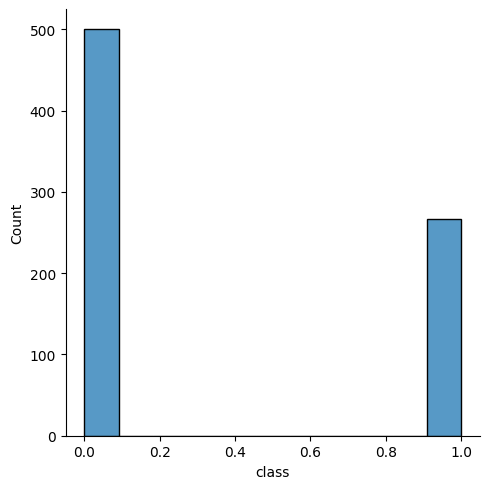

In [99]:
sns.displot(df, x='class')

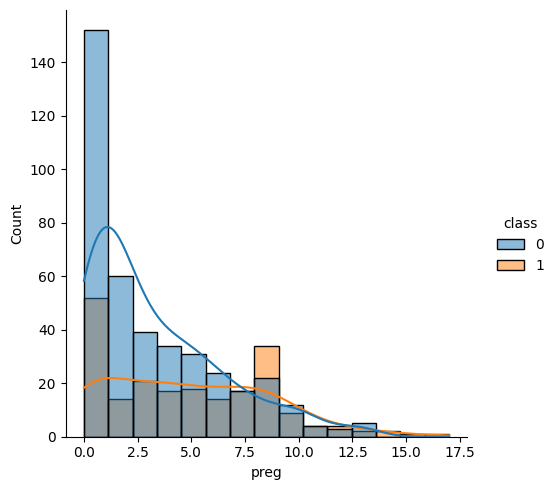

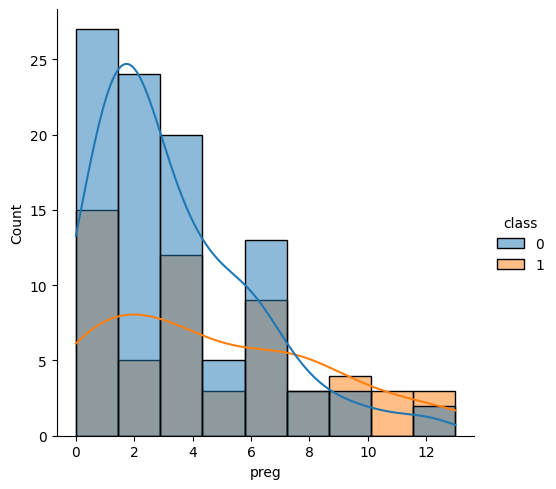

In [100]:
sns.displot(train_set, x='preg', hue='class', kde=True)
sns.displot(test_set, x='preg', hue='class', kde=True)

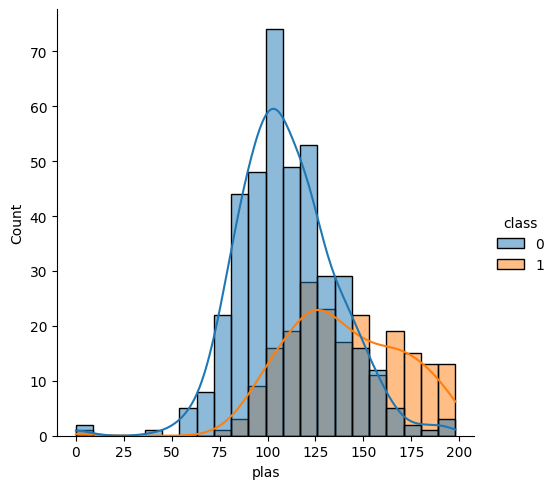

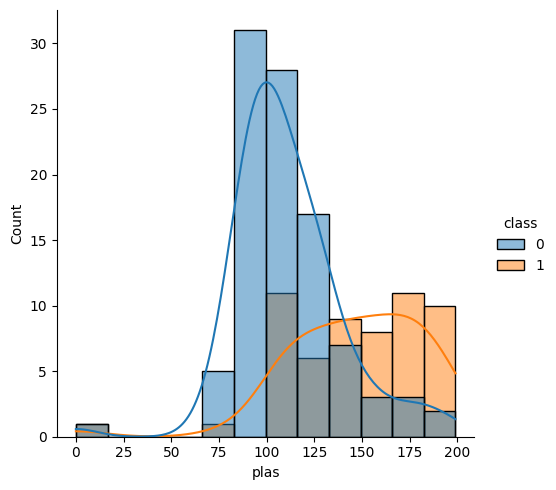

In [101]:
sns.displot(train_set, x='plas', hue='class', kde=True)
sns.displot(test_set, x='plas', hue='class', kde=True)

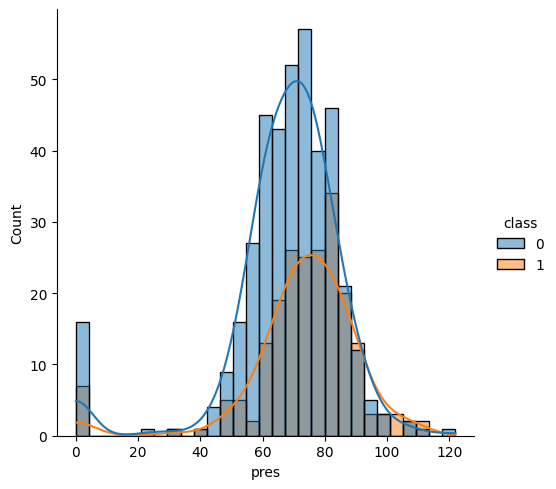

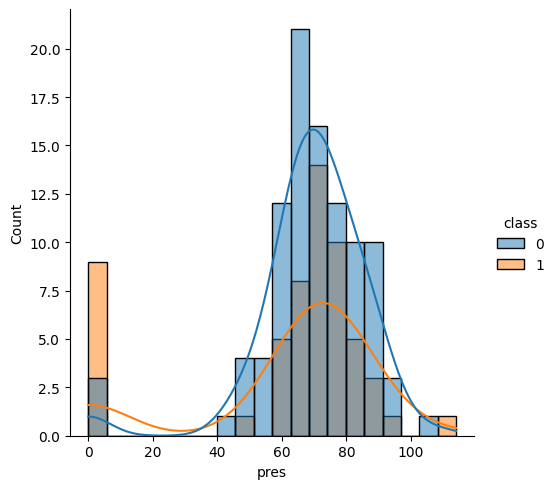

In [102]:
sns.displot(train_set, x='pres', hue='class', kde=True)
sns.displot(test_set, x='pres', hue='class', kde=True)

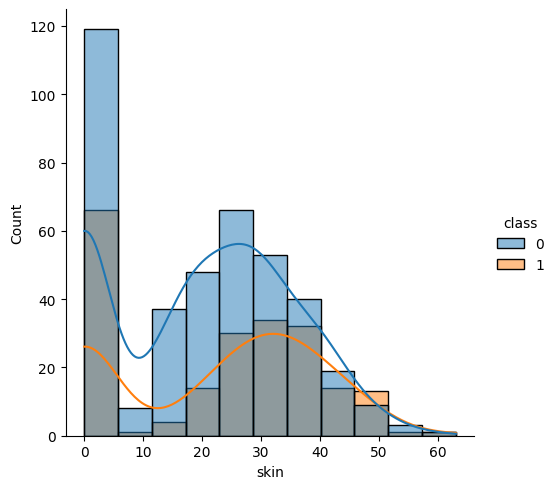

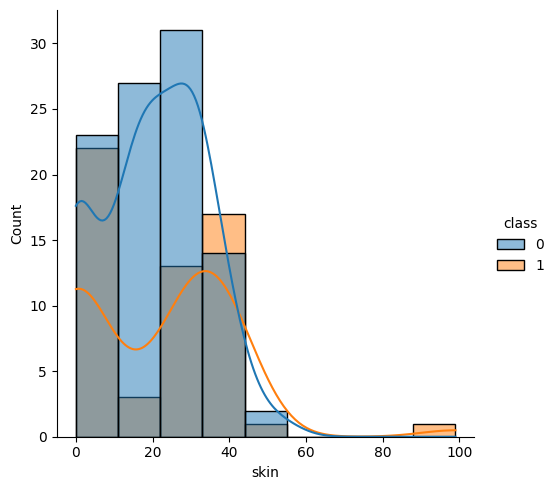

In [103]:
sns.displot(train_set, x='skin', hue='class', kde=True)
sns.displot(test_set, x='skin', hue='class', kde=True)

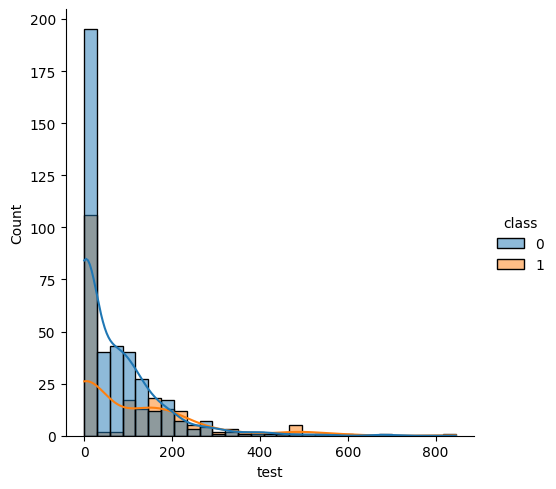

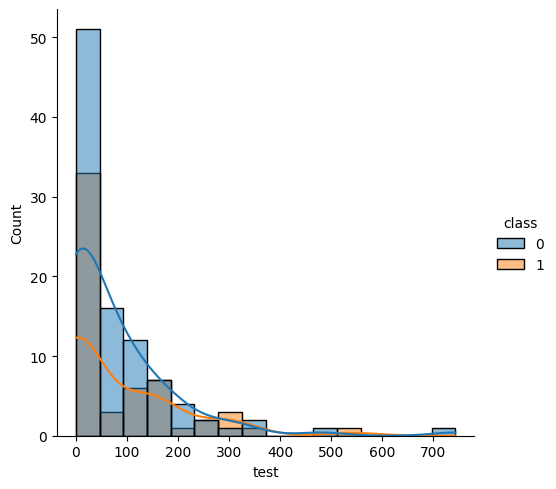

In [104]:
sns.displot(train_set, x='test', hue='class', kde=True)
sns.displot(test_set, x='test', hue='class', kde=True)

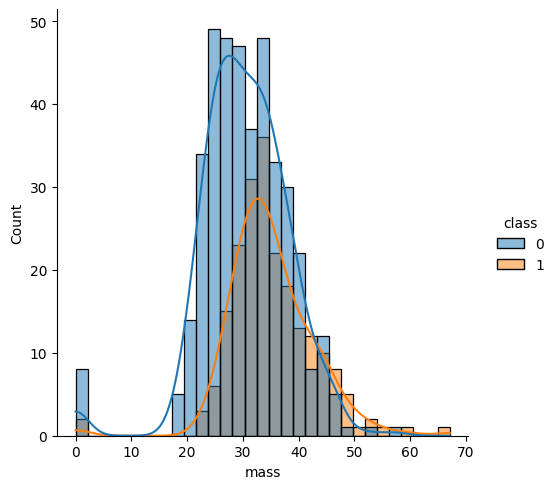

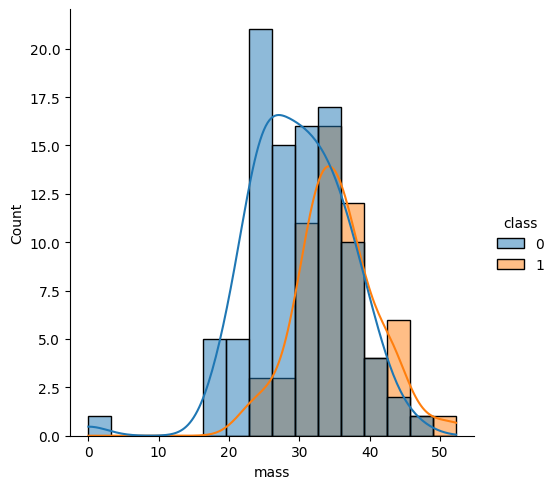

In [105]:
sns.displot(train_set, x='mass', hue='class', kde=True)
sns.displot(test_set, x='mass', hue='class', kde=True)

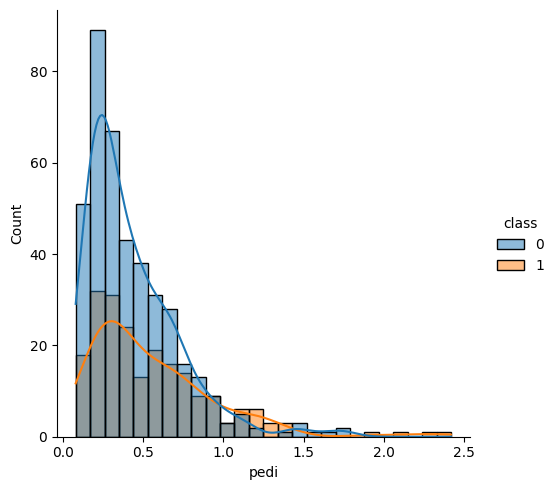

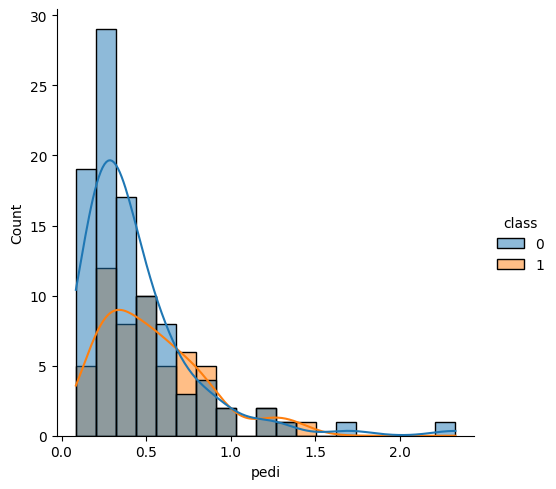

In [106]:
sns.displot(train_set, x='pedi', hue='class', kde=True)
sns.displot(test_set, x='pedi', hue='class', kde=True)

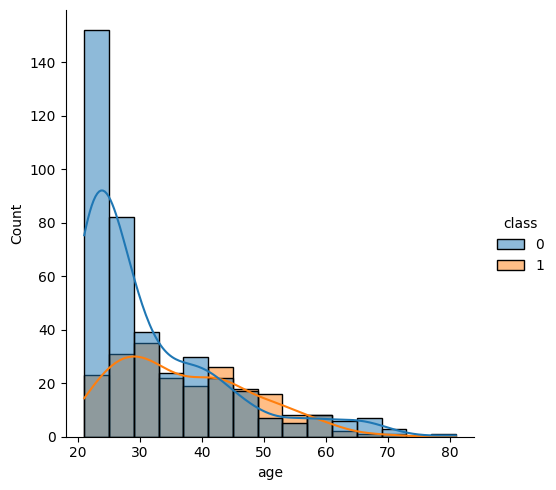

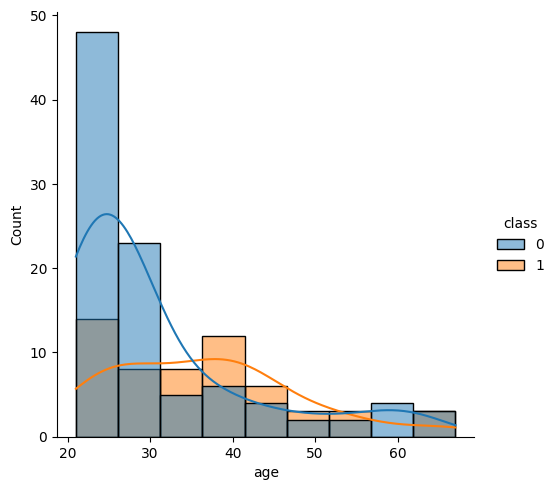

In [107]:
sns.displot(train_set, x='age', hue='class', kde=True)
sns.displot(test_set, x='age', hue='class', kde=True)

In [108]:
onehot = ["preg","plas", "press","skin", "test","mass", "pedi", "age"]


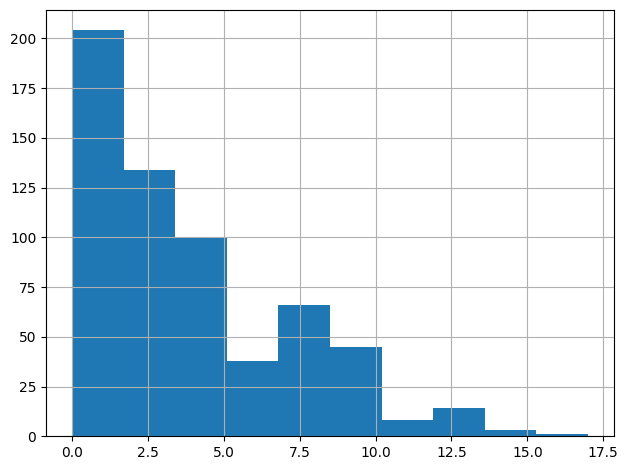

In [109]:
train_set["preg"].hist()
plt.tight_layout()

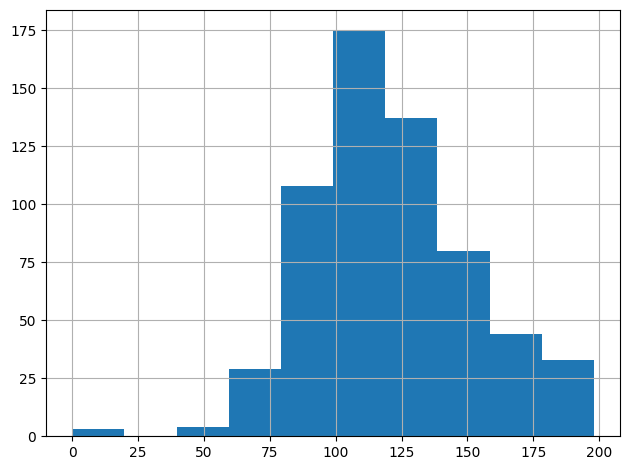

In [110]:
train_set["plas"].hist()
plt.tight_layout()

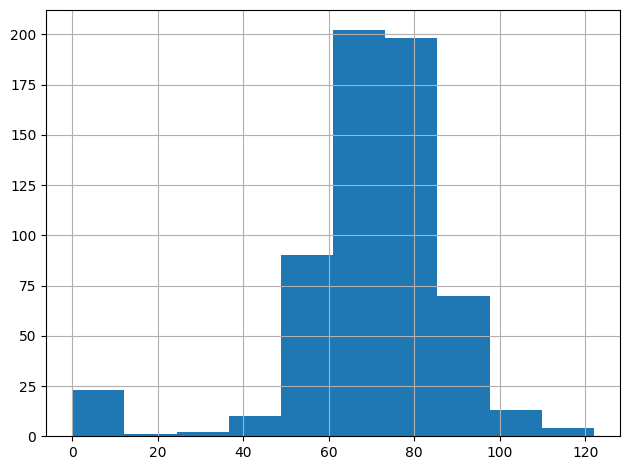

In [111]:
train_set["pres"].hist()
plt.tight_layout()

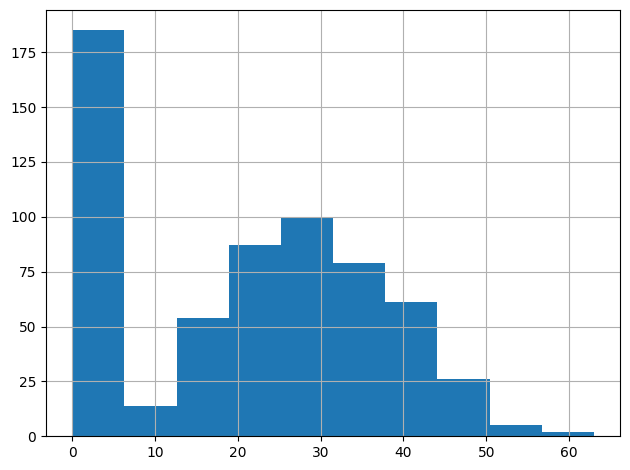

In [112]:
train_set["skin"].hist()
plt.tight_layout()

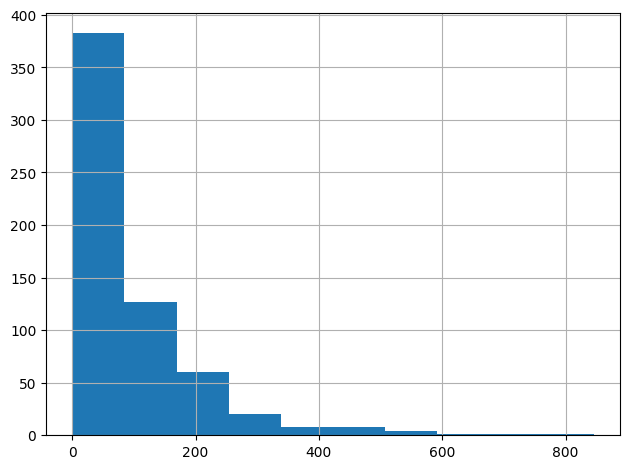

In [113]:
train_set["test"].hist()

plt.tight_layout()

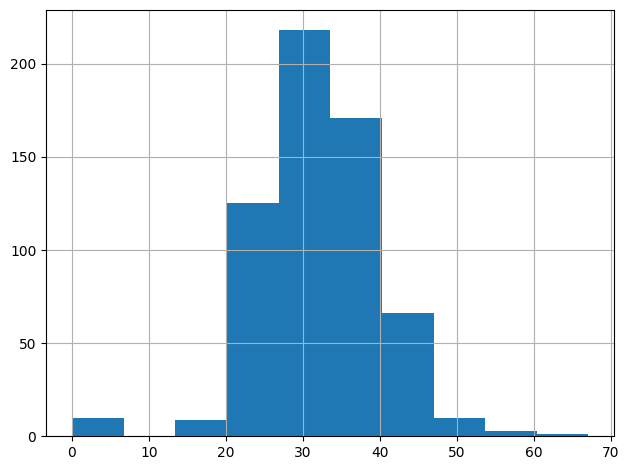

In [114]:
train_set["mass"].hist()
plt.tight_layout()

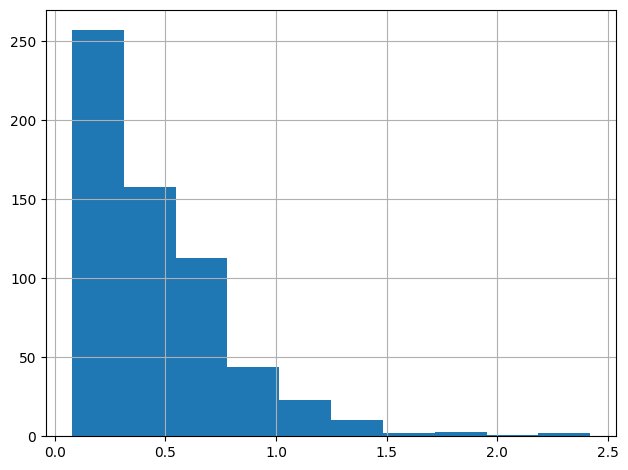

In [115]:
train_set["pedi"].hist()
plt.tight_layout()

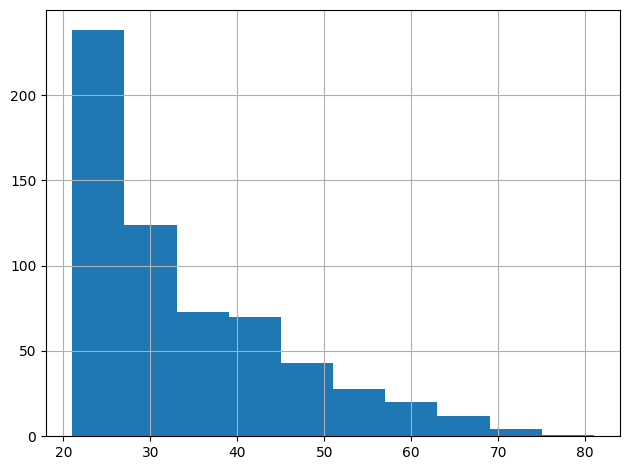

In [116]:
train_set["age"].hist()
plt.tight_layout()

In [121]:
X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [122]:
lr_clf = LogisticRegression(max_iter = 1000)
lr_clf.fit(X_train, y_train)
y_pred = lr_clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       100
           1       0.68      0.70      0.69        54

    accuracy                           0.78       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.78      0.78      0.78       154



In [123]:
tree_clf = DecisionTreeClassifier(random_state = 42)
tree_clf.fit(X_train, y_train)
print(classification_report(y_train, tree_clf.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       213

    accuracy                           1.00       613
   macro avg       1.00      1.00      1.00       613
weighted avg       1.00      1.00      1.00       613



In [124]:
print(classification_report(y_test, tree_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.77      0.72      0.75       100
           1       0.54      0.61      0.57        54

    accuracy                           0.68       154
   macro avg       0.66      0.67      0.66       154
weighted avg       0.69      0.68      0.69       154



In [125]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    "max_depth": [1,2,4,8,None],
    "class_weight": ["balanced",None],
    "min_samples_leaf": [10,20,30,40],
    "max_features": ["sqrt","log2",None]
}

tree_grid = GridSearchCV(tree_clf,
                        param_grid = param_grid,
                        cv = 5,
                        scoring = "balanced_accuracy")

tree_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'class_weight': ['balanced', None],
                         'max_depth': [1, 2, 4, 8, None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [10, 20, 30, 40]},
             scoring='balanced_accuracy')

In [126]:
tree_grid.best_params_

{'class_weight': 'balanced',
 'max_depth': 4,
 'max_features': None,
 'min_samples_leaf': 20}

In [127]:
print(classification_report(y_test, tree_grid.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80       100
           1       0.62      0.70      0.66        54

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [128]:
pd.DataFrame({"features": tree_grid.best_estimator_.feature_names_in_, "importancia": tree_grid.best_estimator_.feature_importances_})

,features,importancia
0,preg,0.003851
1,plas,0.530583
2,pres,0.000000
3,skin,0.000000
4,test,0.000000
5,mass,0.238455
6,pedi,0.072094
7,age,0.155017


In [129]:
from sklearn.ensemble import RandomForestClassifier


rnd_clf = RandomForestClassifier(n_estimators=500,
                                max_depth=4,
                                random_state=42)

rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

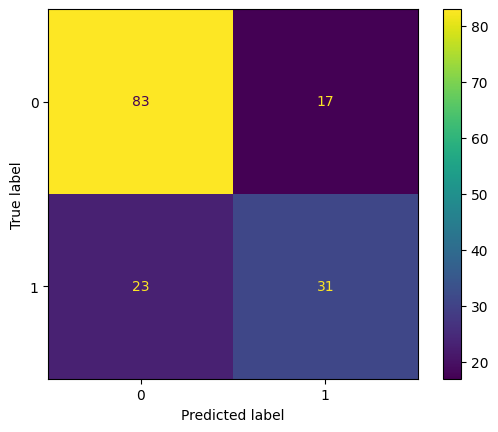

In [130]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)

In [131]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.78      0.83      0.81       100
           1       0.65      0.57      0.61        54

    accuracy                           0.74       154
   macro avg       0.71      0.70      0.71       154
weighted avg       0.73      0.74      0.74       154



In [132]:
rnd_clf.feature_importances_

array([0.06226086, 0.3756591 , 0.03537283, 0.04811044, 0.07193513,
       0.177003  , 0.08940415, 0.14025449])

In [135]:
param_grid_clf = { 
    "n_estimators": [100,200,400], 
    "max_depth": [2,4,8,None],
    "max_features": ["sqrt", "log2", None], 
    "class_weight": ["balanced", None]
}

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

clf_rf = RandomForestClassifier()

grid_models = GridSearchCV(clf_rf,
                           param_grid_clf,
                           scoring = "balanced_accuracy", # es el recall medio considerando el recall de cada clase
                           cv = 5
                          )

grid_models.fit(X_train, y_train)

In [ ]:
grid_models.best_params_

In [ ]:
grid_models.best_score_

In [ ]:
best_model = grid_models.best_estimator_

In [141]:
classes = X.columns.values.tolist()

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.2,
                                                   random_state=55)

In [142]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report

ada_clf = AdaBoostClassifier(n_estimators=200, random_state=42)

ada_clf.fit(X_train, y_train)

y_pred = ada_clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       102
           1       0.64      0.69      0.67        52

    accuracy                           0.77       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.77      0.77      0.77       154

